<a href="https://colab.research.google.com/github/s-miramontes/News_Filter/blob/master/notebooks/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data for Clustering

In [0]:
# import statements 

import pandas as pd
import re
from joblib import Parallel, delayed
from textblob import TextBlob 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data from Local File System

Datasets are located here: https://www.kaggle.com/snapcrack/all-the-news/version/4#articles3.csv

*   download and store all three 'csv' files in a 'data' directory at the location of your choice
*   concatenate the three into one dataframe 

In [0]:
# import raw data
articles_3 = pd.read_csv('news_filter/data/articles3.csv')
articles_2 = pd.read_csv('news_filter/data/articles2.csv')
articles_1 = pd.read_csv('news_filter/data/articles1.csv')

In [3]:
articles_3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [4]:
articles_2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [5]:
articles_1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [6]:
# publications in articles_3.csv
set(articles_3.publication)

{'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post'}

In [7]:
# publications in articles_2.csv
set(articles_2.publication)

{'Atlantic',
 'Buzzfeed News',
 'Fox News',
 'Guardian',
 'National Review',
 'New York Post',
 'Talking Points Memo'}

In [8]:
# publications in articles_1.csv
set(articles_1.publication)

{'Atlantic', 'Breitbart', 'Business Insider', 'CNN', 'New York Times'}

In [9]:
# join all datasets into one
full_data = pd.concat([articles_1, articles_2, articles_3], ignore_index=True)

full_data.shape

(142570, 10)

In [10]:
full_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


## Bias Filter



*   Naive: [all-sides](https://www.allsides.com/media-bias/media-bias-ratings) to filter by publication
*   Sentiment: polarity and subjectivity of articles 
*   Frequency: number of articles/publication that mention a topic



### Publisher Bias

In [0]:
# publisher bias ratings from AllSides
publisher_bias = {'Atlantic': 'left-center',
 'Breitbart': 'right',
 'Business Insider': 'center',
 'Buzzfeed News': 'left',
 'CNN': 'left-center',
 'Fox News': 'right',
 'Guardian': 'left-center',
 'NPR': 'center',
 'National Review': 'right',
 'New York Post': 'right',
 'New York Times': 'left-center',
 'Reuters': 'center',
 'Talking Points Memo': 'left-center',
 'Vox': 'left',
 'Washington Post': 'left-center'}

In [0]:
# dataframe with publisher and bias rating
pbias_df = pd.DataFrame({'publication':list(publisher_bias.keys()), 'pub_bias':list(publisher_bias.values())})

In [13]:
# merge full_data with publisher bias
full_data = full_data.merge(pbias_df, how="inner", on='publication')

full_data.shape

(142570, 11)

In [14]:
full_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,left-center
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",left-center
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",left-center
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",left-center
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",left-center


### Sentiment

In [0]:
# function to return the polarity and subjectivity score of each article ([-1, 1], [0,1])
def get_article_sentiment(article): 
    analysis = TextBlob(article) 
    return (analysis.sentiment.polarity, analysis.sentiment.subjectivity)

In [0]:
# use get_article_sentiment to get sentiment score for all the article contents
sentiment = full_data.apply(lambda row: get_article_sentiment(row['content']), axis =1)

polarity, subjectivity = zip(*sentiment)

In [17]:
full_data['polarity'] = polarity
full_data['subjectivity'] = subjectivity

full_data.shape

(142570, 13)

In [18]:
full_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,left-center,0.028842,0.455535
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",left-center,-0.001750,0.391766
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",left-center,0.067972,0.436291
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",left-center,0.129795,0.435646
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",left-center,0.186427,0.519223


### Topic Frequency

In [0]:
# topic frequencies and proportions from each publisher 

pub_topic_freq = {'Atlantic':[],
                    'Breitbart':[],
                    'Business Insider':[],
                    'Buzzfeed News':[],
                    'CNN':[],
                    'Fox News':[],
                    'Guardian':[],
                    'NPR':[],
                    'National Review':[],
                    'New York Post':[],
                    'New York Times':[],
                    'Reuters':[],
                    'Talking Points Memo':[],
                    'Vox':[],
                    'Washington Post':[]}


for pub in pub_topic_freq.keys():
  pub_content = full_data.content[full_data.publication == pub]
  topic_freq = {'russia': {}, 'hillary clinton': {}, 'benghazi': {}, 'bernie sanders': {}, 'immigration': {}, 'trump': {}}
  for topic in topic_freq.keys():
    freq = sum([topic in content.lower() for content in pub_content])
    topic_freq[topic]['freq'] = freq 
    topic_freq[topic]['prop'] = freq/len(pub_content) 
  pub_topic_freq[pub] = topic_freq # number and proportion of articles from publisher that mention topic

In [0]:
# create dataframe with topic frequencies and proportions for each publisher 

pubs = [[pub]*len(pub_topic_freq[pub]) for pub in pub_topic_freq.keys()]
publication = [j for i in pubs for j in i]

topic = list(topic_freq.keys())*len(pub_topic_freq.keys())

freqs = [[pub_topic_freq[pub][topic]['freq'] for topic in topic_freq.keys()] for pub in pub_topic_freq.keys()]
frequency = [j for i in freqs for j in i]

props = [[pub_topic_freq[pub][topic]['prop'] for topic in topic_freq.keys()] for pub in pub_topic_freq.keys()]
proportion = [j for i in props for j in i]

pub_topic_freq_df = pd.DataFrame({'publication':publication, 'topic': topic, 'frequency': frequency, 'proportion': proportion})

In [21]:
pub_topic_freq_df.head()

,publication,topic,frequency,proportion
0,Atlantic,russia,969,0.134977
1,Atlantic,hillary clinton,1367,0.190416
2,Atlantic,benghazi,99,0.013790
3,Atlantic,bernie sanders,465,0.064772
4,Atlantic,immigration,769,0.107118


### Visualizations 

#### Frequencies and Porportion of Topics

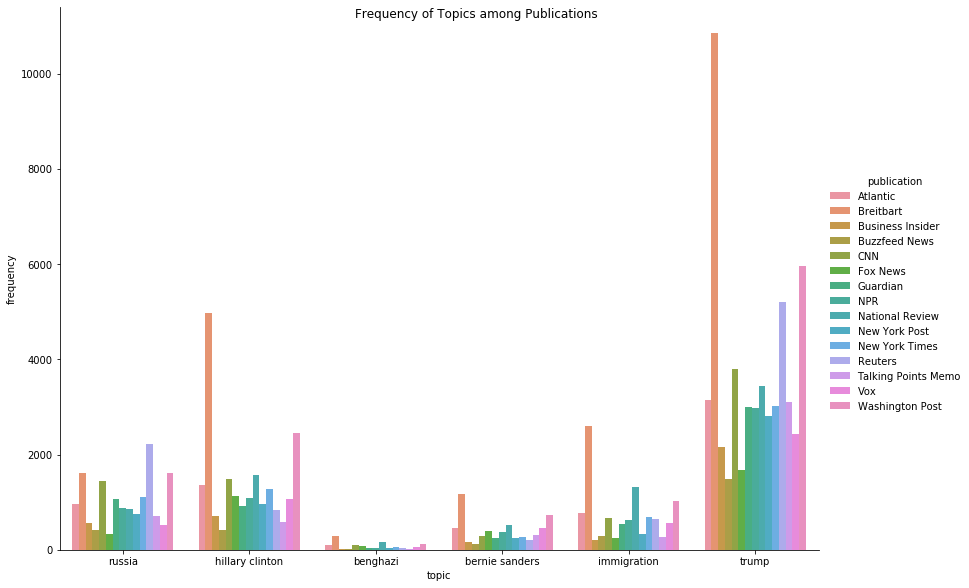

In [22]:
# frequency of topics 
pub_topic_freq_plt = sns.catplot(y='frequency', x='topic', hue='publication', data=pub_topic_freq_df, kind="bar", height=8.27, aspect=11.7/8.27).fig.suptitle('Frequency of Topics among Publications')


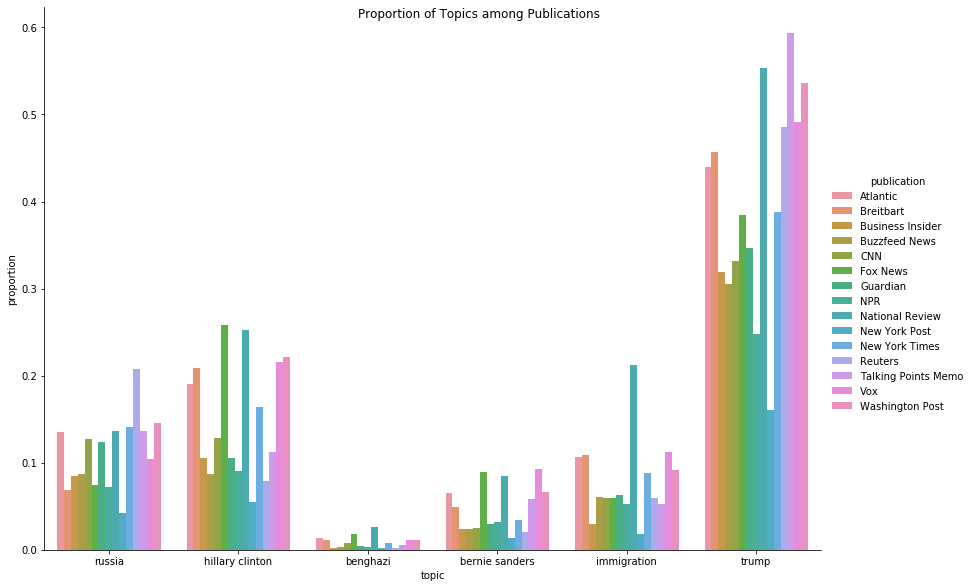

In [23]:
# proportion of topics 
pub_topic_prop_plt = sns.catplot(y='proportion', x='topic', hue='publication', data=pub_topic_freq_df, kind="bar", height=8.27, aspect=11.7/8.27).fig.suptitle('Proportion of Topics among Publications')


#### Sentiment of Articles

[Text(0, 0, 'New York Times'),
 Text(0, 0, 'Breitbart'),
 Text(0, 0, 'CNN'),
 Text(0, 0, 'Business Insider'),
 Text(0, 0, 'Atlantic'),
 Text(0, 0, 'Fox News'),
 Text(0, 0, 'Talking Points Memo'),
 Text(0, 0, 'Buzzfeed News'),
 Text(0, 0, 'National Review'),
 Text(0, 0, 'New York Post'),
 Text(0, 0, 'Guardian'),
 Text(0, 0, 'NPR'),
 Text(0, 0, 'Reuters'),
 Text(0, 0, 'Vox'),
 Text(0, 0, 'Washington Post')]

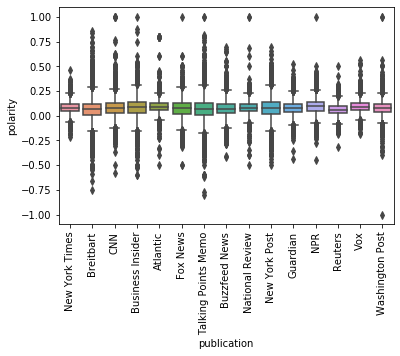

In [24]:
# distribution of polarity of publishers 
pub_polarity_plt = sns.boxplot(x='publication', y='polarity', data=full_data)
pub_polarity_plt.set_xticklabels(pub_polarity_plt.get_xticklabels(), rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

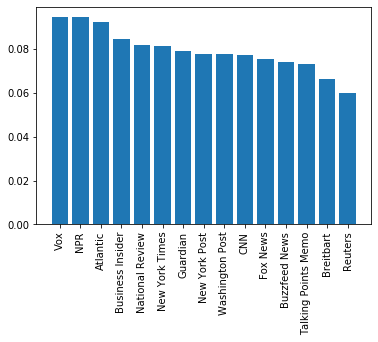

In [25]:
# average polarity of publishers

pub_avg_polarity = full_data.groupby('publication').mean().polarity
avg_polarity_df = pd.DataFrame(pub_avg_polarity).sort_values('polarity', ascending=False)

plt.bar(avg_polarity_df.index.values, avg_polarity_df.values.reshape([1,-1])[0])
plt.xticks(rotation='vertical')

[Text(0, 0, 'New York Times'),
 Text(0, 0, 'Breitbart'),
 Text(0, 0, 'CNN'),
 Text(0, 0, 'Business Insider'),
 Text(0, 0, 'Atlantic'),
 Text(0, 0, 'Fox News'),
 Text(0, 0, 'Talking Points Memo'),
 Text(0, 0, 'Buzzfeed News'),
 Text(0, 0, 'National Review'),
 Text(0, 0, 'New York Post'),
 Text(0, 0, 'Guardian'),
 Text(0, 0, 'NPR'),
 Text(0, 0, 'Reuters'),
 Text(0, 0, 'Vox'),
 Text(0, 0, 'Washington Post')]

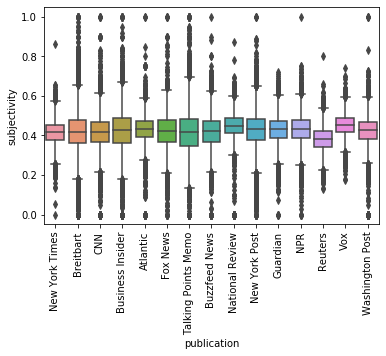

In [26]:
# distribution of subjectivity of publishers 
pub_subject_plt = sns.boxplot(x='publication', y='subjectivity', data=full_data)
pub_subject_plt.set_xticklabels(pub_subject_plt.get_xticklabels(), rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

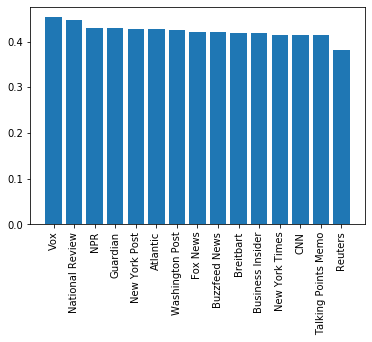

In [27]:
# average subjectivity of publishers

pub_avg_subject = full_data.groupby('publication').mean().subjectivity
avg_subject_df = pd.DataFrame(pub_avg_subject).sort_values('subjectivity', ascending=False)

plt.bar(avg_subject_df.index.values, avg_subject_df.values.reshape([1,-1])[0])
plt.xticks(rotation='vertical')

### Filter for Unbiased Articles

In [28]:
# remove left or right publications 
filter_data = full_data[[bias not in ['left', 'right'] for bias in full_data.pub_bias]]

# keep articles with -0.5< polarity <0.5 
filter_data = filter_data[[(polarity>-0.5) and (polarity<0.5) for polarity in filter_data.polarity]]

# keep articles with subjectivity <0.75
filter_data = filter_data[[subj<0.75 for subj in filter_data.subjectivity]]

filter_data.shape

(80687, 13)

In [29]:
filter_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,left-center,0.028842,0.455535
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",left-center,-0.001750,0.391766
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",left-center,0.067972,0.436291
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",left-center,0.129795,0.435646
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",left-center,0.186427,0.519223


## Clean Data 



*   remove duplicates and missing titles 
*   sample/import 200 for model evaluation  
*   sample 13k for training 
*   remove publisher tags from titles 
*   remove publisher tags from titles 



In [0]:
# remove duplicates from full
full_data = full_data.drop_duplicates(subset=['title', 'publication', 'author', 'date'])

# remove duplicates from filter
filter_data = filter_data.drop_duplicates(subset=['title', 'publication', 'author', 'date'])

In [0]:
# remove missing titles from full
full_data = full_data.dropna(subset=['title'])

# remove missing titles from filter
filter_data = filter_data.dropna(subset=['title'])

In [32]:
## sample 200 observations from full_data (set seed to 5) for evaluation 
#sample200 = full_data.sample(n=200, random_state=5).reset_index()
#sample200.to_csv('news_filter/data/sample200', index=False) # annotate cluster labels 

# import annotated evaluation data 
eval_data = pd.read_csv('news_filter/data/sample200.csv')
set(eval_data.publication)

{'Atlantic',
 'Breitbart',
 'Business Insider',
 'Buzzfeed News',
 'CNN',
 'Fox News',
 'Guardian',
 'NPR',
 'National Review',
 'New York Post',
 'New York Times',
 'Reuters',
 'Talking Points Memo',
 'Vox',
 'Washington Post'}

In [33]:
eval_data.shape

(200, 12)

In [34]:
eval_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,0
1,71184,74592,113594,US Civil Rights Commission Will Observe Standi...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,0
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,0
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,0
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",1


In [35]:
# sample 13k observations from full_data (set seed to 5) for training
small_data = full_data.sample(n=13000, random_state=5).reset_index()
set(small_data.publication)

{'Atlantic',
 'Breitbart',
 'Business Insider',
 'Buzzfeed News',
 'CNN',
 'Fox News',
 'Guardian',
 'NPR',
 'National Review',
 'New York Post',
 'New York Times',
 'Reuters',
 'Talking Points Memo',
 'Vox',
 'Washington Post'}

In [36]:
small_data.shape

(13000, 14)

In [37]:
small_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,right,0.058027,0.408620
1,71184,74592,113594,US Civil Rights Commission Will Observe Stand...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,left,-0.064327,0.412135
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,center,0.082447,0.469048
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,left,0.132338,0.410475
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",left-center,0.111012,0.412202


In [38]:
# sample 13k observations from full_data (set seed to 5) for training
filter_small_data = filter_data.sample(n=13000, random_state=5).reset_index()
set(filter_small_data.publication)

{'Atlantic',
 'Business Insider',
 'CNN',
 'Guardian',
 'NPR',
 'New York Times',
 'Reuters',
 'Talking Points Memo',
 'Washington Post'}

In [39]:
filter_small_data.shape

(13000, 14)

In [40]:
filter_small_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity
0,101379,104839,153712,Has the age of quantum computing arrived?,Guardian,Andrew Anthony,2016-05-22,2016.0,5.0,https://www.theguardian.com/technology/2016/ma...,"Ever since Charles Babbage’s conceptual, unrea...",left-center,0.136875,0.497199
1,65920,69328,98425,Sanders Projected To Win The Wisconsin Democra...,Talking Points Memo,NaN,2016-04-06,2016.0,4.0,https://web.archive.org/web/20160406060830/htt...,Sen. Bernie Sanders ( ) was projected to win t...,left-center,0.319638,0.418182
2,35078,35798,54621,Toxic foam floods the streets of Bangalore,CNN,NaN,2017-05-31,2017.0,5.0,NaN,New Delhi (CNN) In the southern Indian city of...,left-center,0.028901,0.362504
3,101226,104686,153505,"Soul star Sharon Jones dies, aged 60",Guardian,Michael Hann,2016-11-18,2016.0,11.0,https://www.theguardian.com/music/2016/nov/19/...,"The soul singer Sharon Jones has died, aged 60...",left-center,0.158978,0.453571
4,62873,66194,91357,GOPers Make Last-Ditch Attempt To Tie Georgia ...,Talking Points Memo,Caitlin MacNeal,NaN,NaN,NaN,https://web.archive.org/web/20170407001946/htt...,With just under two weeks to go until a specia...,left-center,0.115283,0.462200


In [0]:
# remove publisher tags from article titles 

def clean_title(title):
  title = re.sub(r"(- Breitbart)(?!.*\1)", '', title)
  title = re.sub(r'(- The New York Times)(?!.*\1)', '', title)
  return title
  
eval_data['title'] = Parallel(n_jobs=16)(delayed(clean_title)(title) for title in eval_data.title)
small_data['title'] = Parallel(n_jobs=16)(delayed(clean_title)(title) for title in small_data.title)
filter_small_data['title'] = Parallel(n_jobs=16)(delayed(clean_title)(title) for title in filter_small_data.title)

In [0]:
# change output settings to view entire text
pd.set_option('display.max_colwidth', -1)

In [43]:
# check if titles were successfully cleaned
eval_data.title[120:130]

120    Nine Charged with Sex Assault in Texas High School Hazing Scandal                                            
121    Lou Dobbs: ’Eager Tool of the Establishment’ Paul Ryan ’an Embarrassment’ to the GOP                         
122    Obama’s State Department Sponsored 2016 Meeting of Russian Ambassador with Sen. Sessions                     
123    MS-13 gang member turned FBI informant describes life in the violent street gang                             
124    Wikileaks: Clinton Team Feared Labor Backlash After Obama Cleared Malaysia’s Human Rights Record to Push TPP 
125    Obama Eid Celebration Again Empowers Islamists Over Reformers                                                
126    The Edge: But Who Will Get the Crucial Pizza Rat Vote?                                                       
127    FBI: Clinton ’extremely careless’ but no charges recommended                                                 
128    The New Normal of Colin Kaepernick’s Protest             

In [44]:
# check if titles were successfully cleaned
small_data.title[120:130]

120    Nine Charged with Sex Assault in Texas High School Hazing Scandal                                            
121    Lou Dobbs: ’Eager Tool of the Establishment’ Paul Ryan ’an Embarrassment’ to the GOP                         
122    Obama’s State Department Sponsored 2016 Meeting of Russian Ambassador with Sen. Sessions                     
123    MS-13 gang member turned FBI informant describes life in the violent street gang                             
124    Wikileaks: Clinton Team Feared Labor Backlash After Obama Cleared Malaysia’s Human Rights Record to Push TPP 
125    Obama Eid Celebration Again Empowers Islamists Over Reformers                                                
126     The Edge: But Who Will Get the Crucial Pizza Rat Vote?                                                      
127    FBI: Clinton ’extremely careless’ but no charges recommended                                                 
128    The New Normal of Colin Kaepernick’s Protest             

In [0]:
# join titles with content of article
eval_data['text'] = list(map(lambda i,j: i + " " + j, eval_data.title, eval_data.content))
small_data['text'] = list(map(lambda i,j: i + " " + j, small_data.title, small_data.content))
filter_small_data['text'] = list(map(lambda i,j: i + " " + j, filter_small_data.title, filter_small_data.content))

In [46]:
# reset display settings 
pd.reset_option("all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/home/erusson/anaconda3/lib/python3.7/site-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [47]:
eval_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label,text
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,0,"Chaos in the Family, Chaos in the State: The W..."
1,71184,74592,113594,US Civil Rights Commission Will Observe Standi...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,0,US Civil Rights Commission Will Observe Standi...
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,0,"Venezuela hunts rogue helicopter attackers, Ma..."
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,0,Fruit juice isn’t much better for you than sod...
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",1,Sessions won’t testify at congressional budget...


In [48]:
small_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity,text
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,right,0.058027,0.408620,"Chaos in the Family, Chaos in the State: The W..."
1,71184,74592,113594,US Civil Rights Commission Will Observe Stand...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,left,-0.064327,0.412135,US Civil Rights Commission Will Observe Stand...
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,center,0.082447,0.469048,"Venezuela hunts rogue helicopter attackers, Ma..."
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,left,0.132338,0.410475,Fruit juice isn’t much better for you than sod...
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",left-center,0.111012,0.412202,Sessions won’t testify at congressional budget...


In [49]:
filter_small_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity,text
0,101379,104839,153712,Has the age of quantum computing arrived?,Guardian,Andrew Anthony,2016-05-22,2016.0,5.0,https://www.theguardian.com/technology/2016/ma...,"Ever since Charles Babbage’s conceptual, unrea...",left-center,0.136875,0.497199,Has the age of quantum computing arrived? Ever...
1,65920,69328,98425,Sanders Projected To Win The Wisconsin Democra...,Talking Points Memo,NaN,2016-04-06,2016.0,4.0,https://web.archive.org/web/20160406060830/htt...,Sen. Bernie Sanders ( ) was projected to win t...,left-center,0.319638,0.418182,Sanders Projected To Win The Wisconsin Democra...
2,35078,35798,54621,Toxic foam floods the streets of Bangalore,CNN,NaN,2017-05-31,2017.0,5.0,NaN,New Delhi (CNN) In the southern Indian city of...,left-center,0.028901,0.362504,Toxic foam floods the streets of Bangalore New...
3,101226,104686,153505,"Soul star Sharon Jones dies, aged 60",Guardian,Michael Hann,2016-11-18,2016.0,11.0,https://www.theguardian.com/music/2016/nov/19/...,"The soul singer Sharon Jones has died, aged 60...",left-center,0.158978,0.453571,"Soul star Sharon Jones dies, aged 60 The soul ..."
4,62873,66194,91357,GOPers Make Last-Ditch Attempt To Tie Georgia ...,Talking Points Memo,Caitlin MacNeal,NaN,NaN,NaN,https://web.archive.org/web/20170407001946/htt...,With just under two weeks to go until a specia...,left-center,0.115283,0.462200,GOPers Make Last-Ditch Attempt To Tie Georgia ...


In [0]:
# output csv files for eval and train data
eval_data.to_csv('news_filter/data/eval_data.csv', index=False)
small_data.to_csv('news_filter/data/small_data.csv', index=False)
filter_small_data.to_csv('news_filter/data/filter_small_data.csv', index=False)